In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
from scipy import signal

# Raw data
resp = [85, 0, 255, 0, 0, 0, 2, 40, 0, 18, 39, 0, 0, 55, 0, 0, 0, 81, 0, 0, 0, 122, 1, 0, 1, 0, 139, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 57, 0, 56, 0, 56, 0, 55, 0, 55, 0, 55, 0, 55, 0, 55, 0, 55, 0, 55, 0, 55, 0, 55, 0, 82, 0, 163, 0, 246, 0, 60, 1, 105, 1, 116, 1, 91, 1, 34, 1, 215, 0, 137, 0, 68, 0, 18, 0, 243, 255, 228, 255, 222, 255, 221, 255, 221, 255, 218, 255, 214, 255, 209, 255, 205, 255, 203, 255, 204, 255, 206, 255, 207, 255, 209, 255, 210, 255, 212, 255, 214, 255, 214, 255, 213, 255, 209, 255, 203, 255, 198, 255, 194, 255, 193, 255, 197, 255, 203, 255, 209, 255, 214, 255, 216, 255, 216, 255, 217, 255, 218, 255, 221, 255, 224, 255, 227, 255, 231, 255, 235, 255, 240, 255, 245, 255, 251, 255, 255, 255, 0, 0, 2, 0, 2, 0, 2, 0, 5, 0, 9, 0, 12, 0, 16, 0, 21, 0, 26, 0, 33, 0, 42, 0, 51, 0, 57, 0, 62, 0, 64, 0, 65, 0, 67, 0, 69, 0, 71, 0, 73, 0, 74, 0, 74, 0, 73, 0, 71, 0, 65, 0, 57, 0, 44, 0, 28, 0, 13, 0, 0, 0, 249, 255, 245, 255, 246, 255, 247, 255, 248, 255, 247, 255, 245, 255, 242, 255, 240, 255, 239, 255, 237, 255, 235, 255, 233, 255, 231, 255, 229, 255, 229, 255, 228, 255, 228, 255, 228, 255, 231, 255, 233, 255, 234, 255, 233, 255, 231, 255, 230, 255, 231, 255, 237, 255, 244, 255, 251, 255, 254, 255, 251, 255, 247, 255, 245, 255, 246, 255, 250, 255, 255, 255, 1, 0, 1, 0, 255, 255, 252, 255, 250, 255, 248, 255, 248, 255, 249, 255, 251, 255, 253, 255, 0, 0, 5, 0, 9, 0, 10, 0, 8, 0, 2, 0, 251, 255, 244, 255, 239, 255, 237, 255, 235, 255, 232, 255, 227, 255, 222, 255, 218, 255, 217, 255, 219, 255, 223, 255, 226, 255, 228, 255, 229, 255, 229, 255, 229, 255, 229, 255, 228, 255, 225, 255, 222, 255, 217, 255, 215, 255, 214, 255, 218, 255, 222, 255, 225, 255, 227, 255, 227, 255, 226, 255, 228, 255, 232, 255, 237, 255, 241, 255, 243, 255, 242, 255, 242, 255, 242, 255, 246, 255, 251, 255, 0, 0, 6, 0, 11, 0, 15, 0, 20, 0, 24, 0, 27, 0, 27, 0, 25, 0, 23, 0, 22, 0, 23, 0, 26, 0, 28, 0, 27, 0, 23, 0, 15, 0, 5, 0, 255, 255, 252, 255, 253, 255, 2, 0, 10, 0, 17, 0, 20, 0, 21, 0, 17, 0, 13, 0, 11, 0, 10, 0, 13, 0, 14, 0, 13, 0, 8, 0, 2, 0, 253, 255, 250, 255, 247, 255, 245, 255, 240, 255, 232, 255, 223, 255, 215, 255, 211, 255, 209, 255, 211, 255, 212, 255, 211, 255, 209, 255, 207, 124]

# Removing the filename
resp = resp[7:]

In [ ]:
def original_revert(wave):
    signal = []
    for i in range(len(wave)):
        if i > 0:
            signal.append((wave[i-1] + wave[i])/2)
        signal.append(wave[i])
    return signal

def reduced_voltage(wave):
    return [(value*4033)/(32767*12*8) for value in wave]

# Subtracting the topics information
info = resp[:22]

# Subtracting the HR wave
wave_hr = resp[22:116]

# Subtracting the ECG wave
wave_data = resp[116:]

In [5]:
# Decompress to original data
wave = reduced_voltage(original_revert(wave_data))

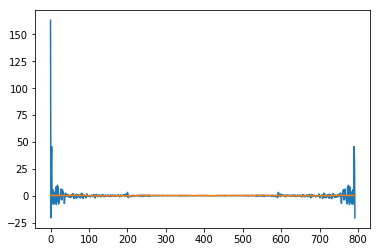

In [17]:
fig, ax = plt.subplots()

# Graph using Fast Fourier Transform
ax.plot(fft(wave))

# Graph using raw wave
ax.plot(wave)